<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

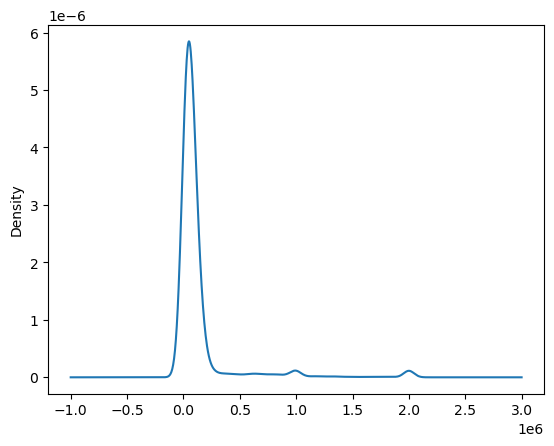

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df['ConvertedComp'].plot.density()

Plot the histogram for the column `ConvertedComp`.


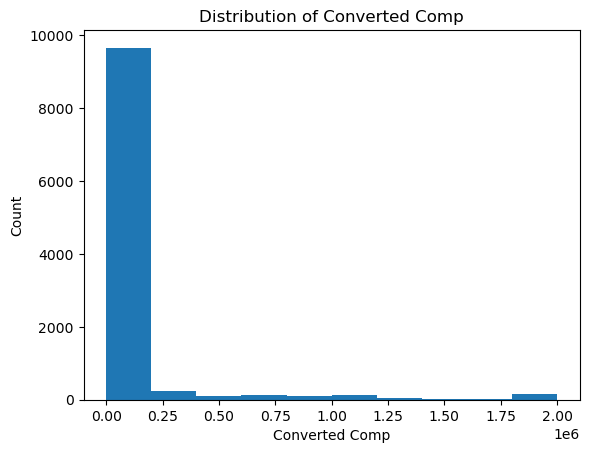

In [4]:
df['ConvertedComp'].plot(kind='hist')

plt.title('Distribution of Converted Comp')
plt.ylabel('Count')
plt.xlabel('Converted Comp')
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [19]:
print(len(df[df['Gender']=='Man']))

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
df_woman= df[df['Gender']=='Woman']
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


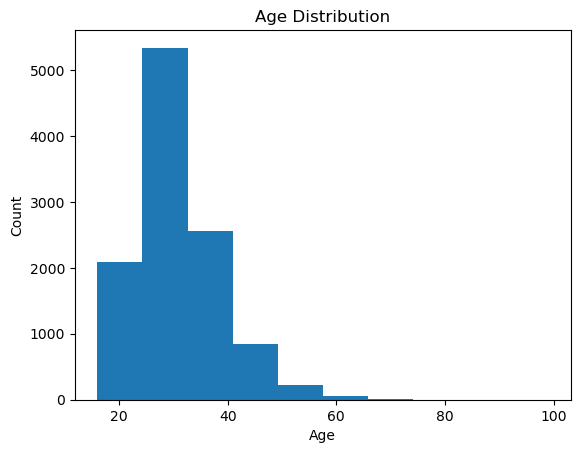

In [9]:
df['Age'].plot(kind='hist')

plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


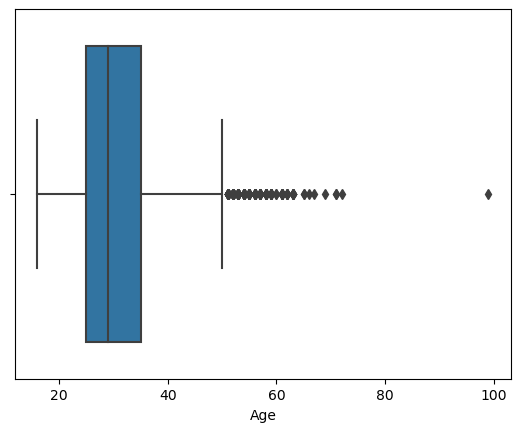

In [10]:
sns.boxplot(x=df["Age"])
plt.show()

In [21]:
# there are in fact outliers which can be seen after the upper whisker

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
Q3 = df['ConvertedComp'].quantile(q=0.75)
Q1 = df['ConvertedComp'].quantile(q=0.25) 
IQR = Q3 - Q1
print(f'Inter Quartile Range for the ConvertedComp column is: {IQR} \n'
     f' The first quartile is: {Q1} \n'
     f' The third quartile is: {Q3} \n')

Inter Quartile Range for the ConvertedComp column is: 73132.0 
 The first quartile is: 26868.0 
 The third quartile is: 100000.0 



Find out the upper and lower bounds.


In [12]:
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print(f'The upper bound for the ConvertedComp column is: {upper_bound} \n'
        f'the lower bound for the ConvertedComp column is: {lower_bound} \n')

The upper bound for the ConvertedComp column is: 209698.0 
the lower bound for the ConvertedComp column is: -82830.0 



Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
outlier_list = [x for x in df['ConvertedComp'] if (
    (x < lower_bound) or (x > upper_bound))]
print(f'There are {len(outlier_list)} outliers in the ConvertedComp column')

There are 879 outliers in the ConvertedComp column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
non_outlier_list = [x for x in df['ConvertedComp'] if (
    (x > lower_bound) and (x < upper_bound))]
len(non_outlier_list)
non_outlier_df = df.loc[df['ConvertedComp'].isin(non_outlier_list)]
non_outlier_df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11392      9600.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 9703, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
age_correlation = non_outlier_df.corr(method = 'pearson')['ConvertedComp']
age_correlation

Respondent       0.010878
CompTotal       -0.063561
ConvertedComp    1.000000
WorkWeekHrs      0.034351
CodeRevHrs      -0.088934
Age              0.401821
Name: ConvertedComp, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
